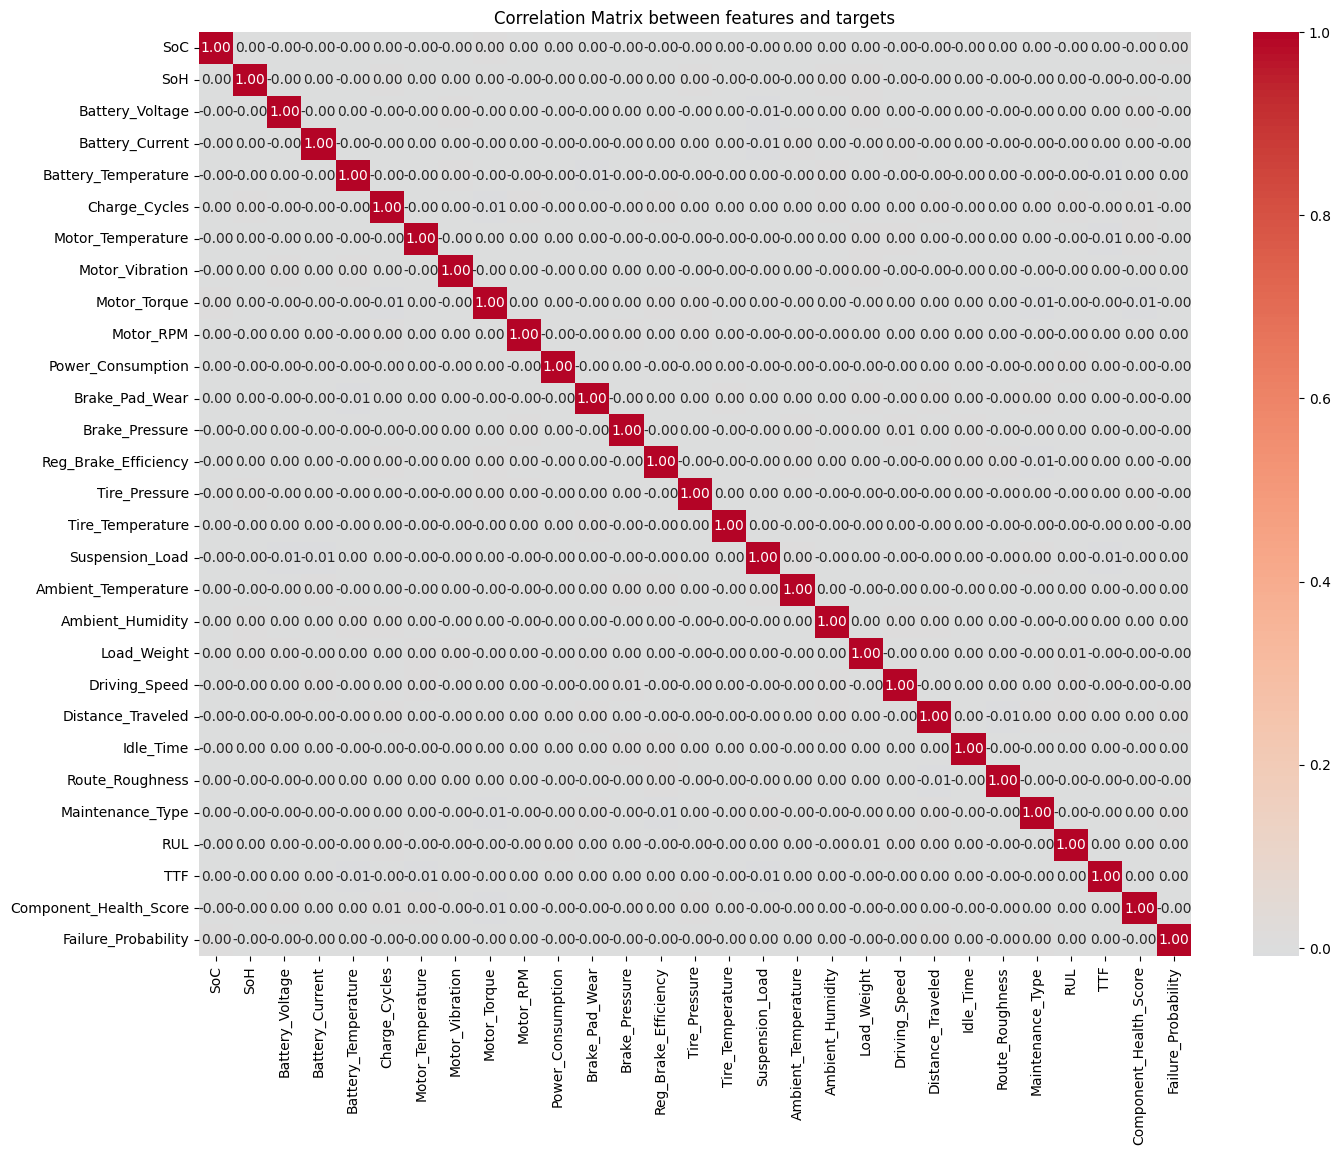

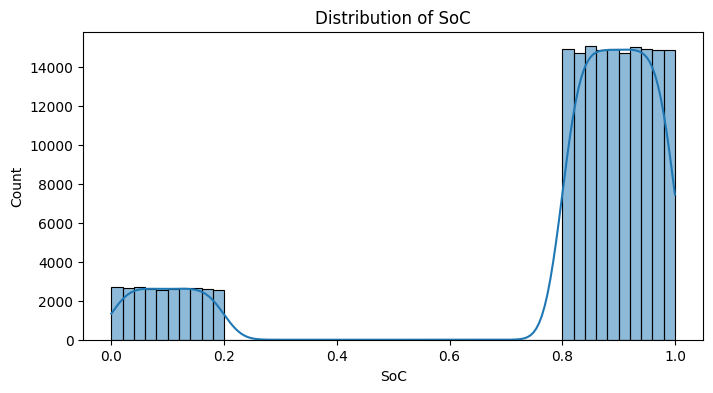

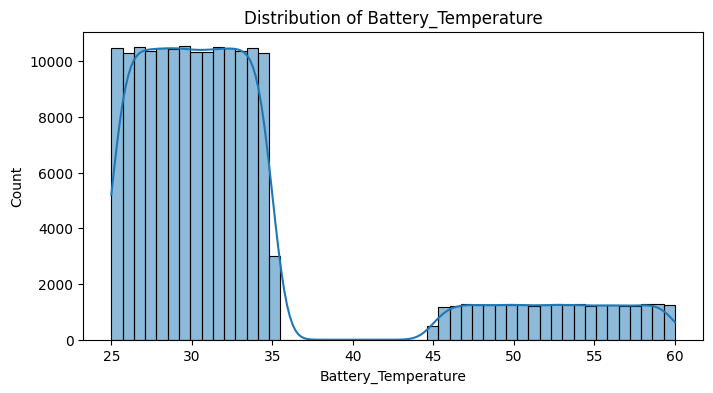

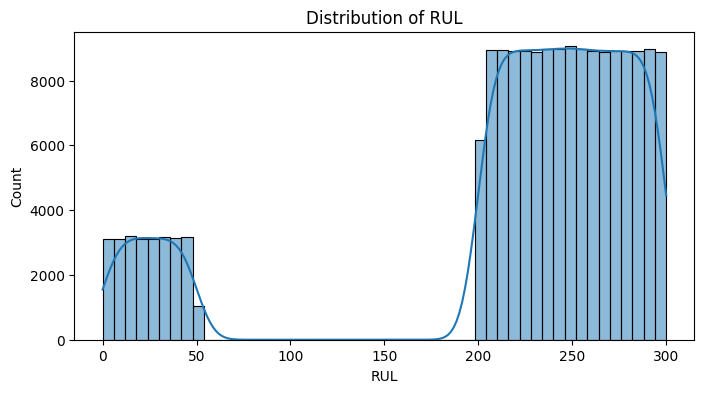

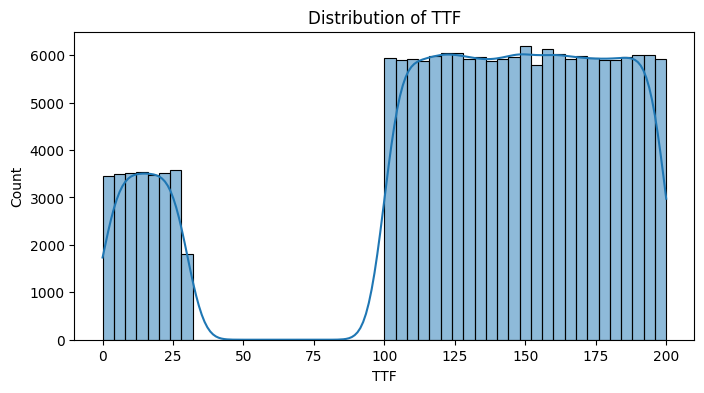

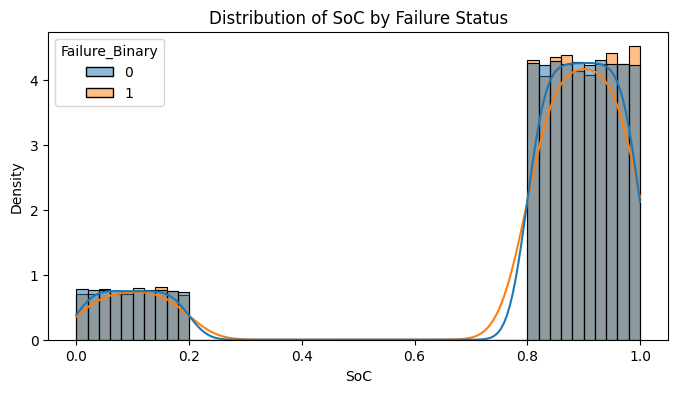

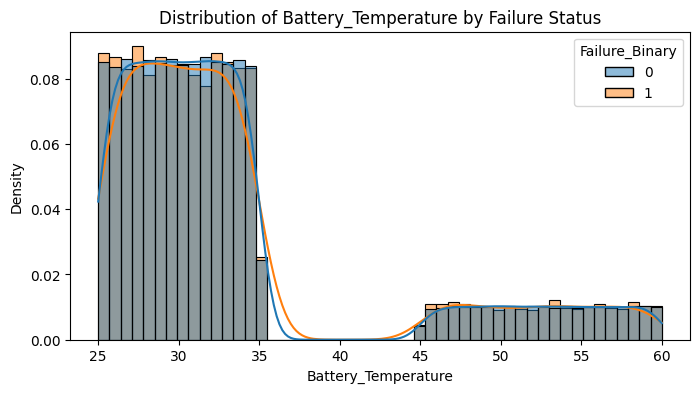

No 'timestamp' column found for time series plots.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('EV_Predictive_Maintenance_Dataset_15min.csv')

# Define feature and target columns
feature_cols = [
    'SoC', 'SoH', 'Battery_Voltage', 'Battery_Current',
    'Battery_Temperature', 'Charge_Cycles',
    'Motor_Temperature', 'Motor_Vibration', 'Motor_Torque', 'Motor_RPM',
    'Power_Consumption', 'Brake_Pad_Wear', 'Brake_Pressure', 'Reg_Brake_Efficiency',
    'Tire_Pressure', 'Tire_Temperature', 'Suspension_Load',
    'Ambient_Temperature', 'Ambient_Humidity', 'Load_Weight',
    'Driving_Speed', 'Distance_Traveled', 'Idle_Time', 'Route_Roughness','Maintenance_Type'
]

target_cols = ['RUL', 'TTF', 'Component_Health_Score', 'Failure_Probability']

# Subset the dataframe to only these columns
df_sub = df[feature_cols + target_cols].copy()

# 3. Correlation matrix & heatmap
plt.figure(figsize=(16, 12))
corr = df_sub.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix between features and targets')
plt.show()

# 4. Distribution plots for some example features and targets
for col in ['SoC', 'Battery_Temperature', 'RUL', 'TTF']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_sub[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Distribution by failure status (we'll binarize Failure_Probability as 0/1 with threshold 0.5)
df_sub['Failure_Binary'] = (df_sub['Failure_Probability'] > 0.5).astype(int)

for col in ['SoC', 'Battery_Temperature']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_sub, x=col, hue='Failure_Binary', bins=50, kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {col} by Failure Status')
    plt.show()

# 6. If you have a timestamp column, you can plot time series (adjust column names accordingly)
if 'timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df['timestamp'], df['Battery_Temperature'], label='Battery Temperature')
    plt.plot(df['timestamp'], df['RUL'], label='RUL')
    plt.legend()
    plt.title('Battery Temperature and RUL over time')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'timestamp' column found for time series plots.")

Battery_Temperature     0.002865
Reg_Brake_Efficiency    0.002251
Battery_Current         0.002062
Motor_Vibration         0.001540
Charge_Cycles           0.001421
Ambient_Humidity        0.001419
Distance_Traveled       0.000553
SoH                     0.000470
Driving_Speed           0.000310
Battery_Voltage         0.000194
Tire_Temperature        0.000155
Load_Weight             0.000146
Idle_Time               0.000075
Motor_Torque            0.000000
Motor_Temperature       0.000000
SoC                     0.000000
Motor_RPM               0.000000
Suspension_Load         0.000000
Tire_Pressure           0.000000
Brake_Pad_Wear          0.000000
Brake_Pressure          0.000000
Power_Consumption       0.000000
Ambient_Temperature     0.000000
Route_Roughness         0.000000
Maintenance_Type        0.000000
dtype: float64


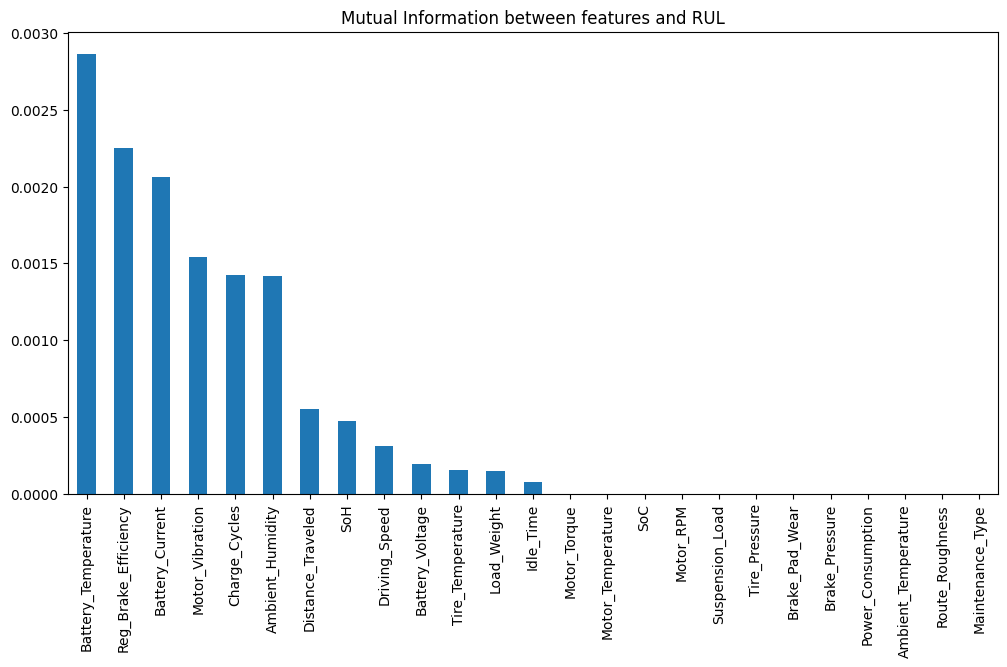

In [3]:
from sklearn.feature_selection import mutual_info_regression

X = df_sub[feature_cols]
y = df_sub['RUL']

mi = mutual_info_regression(X.fillna(0), y.fillna(0))
mi_series = pd.Series(mi, index=feature_cols).sort_values(ascending=False)

print(mi_series)

mi_series.plot(kind='bar', figsize=(12,6), title="Mutual Information between features and RUL")
plt.show()
